In [1]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [2]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201810.gz', '../BL_Work/openPrescribe/serialized/201710.gz', '../BL_Work/openPrescribe/serialized/201203.gz', '../BL_Work/openPrescribe/serialized/201110.gz', '../BL_Work/openPrescribe/serialized/201804.gz', '../BL_Work/openPrescribe/serialized/201308.gz', '../BL_Work/openPrescribe/serialized/201708.gz', '../BL_Work/openPrescribe/serialized/201211.gz', '../BL_Work/openPrescribe/serialized/201707.gz', '../BL_Work/openPrescribe/serialized/201803.gz', '../BL_Work/openPrescribe/serialized/201410.gz', '../BL_Work/openPrescribe/serialized/201301.gz', '../BL_Work/openPrescribe/serialized/201201.gz', '../BL_Work/openPrescribe/serialized/201409.gz', '../BL_Work/openPrescribe/serialized/201812.gz', '../BL_Work/openPrescribe/serialized/201603.gz', '../BL_Work/openPrescribe/serialized/201109.gz', '../BL_Work/openPrescribe/serialized/201512.gz', '../BL_Work/openPrescribe/serialized/201601.gz', '../BL_Work/openPrescribe/serialized/201101.gz', '../BL_Work/openPre

In [132]:
pdp = pd.read_csv('../BL_Work/openPrescribe/serialized/201101.gz',compression='gzip')
pdp.dropna()
for month in [ '201102' , '201103']:
    file_path  = '../BL_Work/openPrescribe/serialized/' + month + '.gz'
    pdp2 = pd.read_csv(file_path,compression='gzip')
    pdp2.dropna()
    pdp.append(pdp2)
    

In [133]:
# pdp_BNF = pd.read_csv('../BL_Work/openPrescribe/serialized_BNF/201601.gz',compression='gzip')
# pdp_BNF.dropna()
# for month in [ '201602' , '201603']:
#     file_path  = '../BL_Work/openPrescribe/serialized_BNF/' + month + '.gz'
#     pdp2 = pd.read_csv(file_path,compression='gzip')
#     pdp2.dropna()
#     pdp_BNF.append(pdp2)

In [134]:
pdp.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,2,Q30,5D7,A86003,0101010G0AAABAB,Co-Magaldrox_Susp 195mg/220mg/5ml S/F,33.0,81.00,75.65,18000.0,...,NaN,NaN,NaN,NaN,220.0,0101010G0,18000.0,1.0,18000.0,AA
1,3,Q30,5D7,A86003,0101010G0BCABAB,Mucogel_Susp 195mg/220mg/5ml S/F,2.0,3.42,3.22,1000.0,...,NaN,NaN,NaN,NaN,220.0,0101010G0,1000.0,1.0,1000.0,BC
2,4,Q30,5D7,A86003,0101010L0BEAAAI,Maalox Plus_Susp S/F,1.0,5.58,5.17,1000.0,...,NaN,NaN,NaN,NaN,0.0,0101010L0,200.0,1.0,200.0,BE
3,5,Q30,5D7,A86003,0101010P0AAAAAA,Co-Simalcite_Susp 125mg/500mg/5ml S/F,1.0,2.79,2.60,500.0,...,NaN,NaN,NaN,NaN,500.0,0101010P0,100.0,1.0,100.0,AA
4,6,Q30,5D7,A86003,0101010R0AAABAB,Simeticone_Susp 40mg/ml S/F,1.0,2.45,2.29,50.0,...,NaN,NaN,NaN,NaN,40.0,0101010R0,10.0,1.0,10.0,AA


In [135]:
# pdp = pd.read_csv('../BL_Work/openPrescribe/serialized/201601.gz',compression='gzip')
# pdp.dropna()


In [136]:
set(pdp['12'])

{nan,
 "Meniere's disease",
 'bipolar',
 "crohn's disease",
 'dementia',
 'depression',
 'diabetes',
 'gastroparesis',
 'hypothyroidism',
 'interstitial cystitis',
 'irritable bowel syndrome',
 'parkinson',
 'psoriasis',
 'rheumatoid',
 'sleep apnea'}

In [137]:
%store -r taxonomyDict

In [138]:
%store -r cityMap

In [139]:
disease_drugs = json.load(open("Disease_Drug_DrugBank.json",'rb'))

In [140]:
# pdp.head(n=1000)

In [171]:
ward_pop1 = pd.read_csv('ward_pop.csv')

In [172]:
ward_pop = pd.read_csv('../BL_Work/mid_2010_ward_2010_quinary.csv')

In [192]:
ward_pop1.head()

,Ward Code 1,Ward Name 1,Local Authority,All Ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,E05000026,Abbey,Barking and Dagenham,"15,133",351,332,361,311,328,290,...,18,15,22,14,14,19,12,6,10,14
1,E05000027,Alibon,Barking and Dagenham,"10,853",178,185,205,205,196,222,...,31,32,23,22,34,20,14,20,17,59
2,E05000028,Becontree,Barking and Dagenham,"14,466",303,304,285,320,294,271,...,28,25,22,29,19,22,15,19,11,65
3,E05000029,Chadwell Heath,Barking and Dagenham,"11,140",196,176,175,177,199,168,...,60,41,44,43,33,38,35,28,22,146
4,E05000030,Eastbrook,Barking and Dagenham,"11,464",185,156,177,172,165,156,...,54,46,51,56,42,37,28,29,30,139


In [191]:
ward_pop[ward_pop['Ward Code']=='E05000028']

,Ward Code,Ward Name,Local Authority,All Ages,0-4,5-9,10-14,15-19,20-24,25-29,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
27,E05000028,Becontree,Barking and Dagenham,"12,134","1,179",847,812,856,958,"1,071",...,994,862,659,478,400,280,242,206,177,261


In [143]:
len(ward_pop)

8297

In [144]:
GP_META = pd.read_csv('../BL_Work/epraccur.csv',header=None)
GP_META.rename(columns={0:'BP_code',
                        1:'Name',
                        2:'Grouping',
                        3:'National_geo',
                        4:'Addr1',
                        5:'Addr2',
                        6:'Addr3',
                        7: 'Addr4',
                        8:'Addr5',
                        9:'Postcode',
                        10:'Open',
                        11:'Closed',
                        12:'Status',
                        13:'Org type code',
                        14:'Commissioner',
                        15:'Join provider',
                        16:'Left provider',
                        17:'Contact',
                        18:'Null1',
                        19:'Null2',
                        20:'Null3',
                        21:'Amended',
                        22:'Null4',
                        23:'Provider',
                        24:'Null5',
                        25:'Setting',
                        26:'Null6'}, 
                 inplace=True)

In [145]:
GP_META.head()

,BP_code,Name,Grouping,National_geo,Addr1,Addr2,Addr3,Addr4,Addr5,Postcode,...,Contact,Null1,Null2,Null3,Amended,Null4,Provider,Null5,Setting,Null6
0,A81001,THE DENSHAM SURGERY,Y63,Q74,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,NaN,TS18 1HU,...,01642 672351,NaN,NaN,NaN,1,NaN,00K,NaN,4,NaN
1,A81002,QUEENS PARK MEDICAL CENTRE,Y63,Q74,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,NaN,TS18 2AW,...,01642 679681,NaN,NaN,NaN,1,NaN,00K,NaN,4,NaN
2,A81003,VICTORIA MEDICAL PRACTICE,Y54,Q74,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,NaN,TS26 8DB,...,01429 272945,NaN,NaN,NaN,0,NaN,00K,NaN,4,NaN
3,A81004,BLUEBELL MEDICAL CENTRE,Y63,Q74,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,NaN,NaN,TS5 8SB,...,01642 827697,NaN,NaN,NaN,1,NaN,00M,NaN,4,NaN
4,A81005,SPRINGWOOD SURGERY,Y63,Q74,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,NaN,TS14 7DJ,...,01287 619611,NaN,NaN,NaN,1,NaN,00M,NaN,4,NaN


In [146]:
Open_filtered_GPs = {}
for index,row in GP_META.iterrows():
    if row ['Setting'] == 4 and row['Status'] =='A':
        Open_filtered_GPs[row['BP_code']] = row['Postcode'].strip()

In [147]:
len(Open_filtered_GPs)

6924

In [148]:
df_city = pd.read_csv('../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2017_Lookup_in_England_and_Wales.csv')

In [149]:
df_city.head()

,LSOA11CD,LSOA11NM,WD17CD,WD17NM,WD17NMW,LAD17CD,LAD17NM,FID
0,E01000001,City of London 001A,E05009288,Aldersgate,NaN,E09000001,City of London,1
1,E01000205,Barnet 035A,E05000052,Garden Suburb,NaN,E09000003,Barnet,2
2,E01000002,City of London 001B,E05009302,Cripplegate,NaN,E09000001,City of London,3
3,E01000003,City of London 001C,E05009302,Cripplegate,NaN,E09000001,City of London,4
4,E01000206,Barnet 033B,E05000052,Garden Suburb,NaN,E09000003,Barnet,5


In [150]:
wardMap = {}
for name , group in df_city.groupby('WD17CD'):
        wardMap[name] = list(group['LSOA11CD'])

In [252]:
# IMD_df = pd.read_csv('../BL_Work/File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv')
IMD_df = pd.read_csv('../BL_Work/IMD_2010.csv')

In [253]:
IMD_df.head()

,LSOA CODE,PRE 2009 LA CODE,PRE 2009 LA NAME,POST 2009 LA CODE,POST 2009 LA NAME,GOR CODE,GOR NAME,IMD SCORE,RANK OF IMD SCORE (where 1 is most deprived),INCOME SCORE,...,Wider Barriers Sub-domain Score,Wider Barriers Sub-domain Rank (where 1 is most deprived),Children/Young People Sub-domain Score,Children/Young People Sub-domain Rank (where 1 is most deprived),Skills Sub-domain Score,Skills Sub-domain Rank (where 1 is most deprived),IDACI score,Rank of IDACI (where 1 is most deprived),IDAOPI score,Rank of IDAOPI (where 1 is most deprived)
0,E01000001,00AA,City of London,00AA,City of London,H,London,6.16,28814,0.01,...,59.01,2105,0.41,31905,0.01,32462,0.04,28761,0.00,32456
1,E01000002,00AA,City of London,00AA,City of London,H,London,5.59,29450,0.01,...,58.37,2176,0.50,31775,0.02,32452,0.00,32415,0.03,32339
2,E01000003,00AA,City of London,00AA,City of London,H,London,13.29,20047,0.07,...,79.86,597,13.65,17752,0.66,31549,0.19,13938,0.18,14932
3,E01000004,00AA,City of London,00AA,City of London,H,London,11.17,22503,0.04,...,64.64,1556,3.30,28082,0.22,32166,0.05,27689,0.07,29527
4,E01000005,00AA,City of London,00AA,City of London,H,London,21.36,12978,0.16,...,64.10,1603,29.81,8580,10.68,20258,0.29,8404,0.35,4973


In [254]:
IMD_df.columns

Index([u'LSOA CODE', u'PRE 2009 LA CODE', u'PRE 2009 LA NAME',
       u'POST 2009 LA CODE', u'POST 2009 LA NAME', u'GOR CODE', u'GOR NAME',
       u'IMD SCORE', u'RANK OF IMD SCORE (where 1 is most deprived)',
       u'INCOME SCORE', u'RANK OF INCOME SCORE (where 1 is most deprived)',
       u'EMPLOYMENT SCORE',
       u'RANK OF EMPLOYMENT SCORE (where 1 is most deprived)',
       u'HEALTH DEPRIVATION AND DISABILITY SCORE',
       u'RANK OF HEALTH DEPRIVATION AND DISABILITY SCORE (where 1 is most deprived)',
       u'EDUCATION SKILLS AND TRAINING SCORE',
       u'RANK OF EDUCATION SKILLS AND TRAINING SCORE (where 1 is most deprived)',
       u'BARRIERS TO HOUSING AND SERVICES SCORE',
       u'RANK OF BARRIERS TO HOUSING AND SERVICES SCORE (where 1 is most deprived)',
       u'CRIME AND DISORDER SCORE',
       u'RANK OF CRIME SCORE (where 1 is most deprived)',
       u'LIVING ENVIRONMENT SCORE',
       u'RANK OF LIVING ENVIRONMENT SCORE (where 1 is most deprived)',
       u'Indoors Sub-

In [154]:
LSOA_survey_takers = json.load(open('LSOA_suvery_pop.json'))

In [255]:
LSOA_pop = {}
LSOA_IMD = {'Skills Sub-domain Score':{},'Children/Young People Sub-domain Score':{},'Wider Barriers Sub-domain Score':{},'Geographical Barriers Sub-domain Score' : {} , 'Outdoors Sub-domain Score' : {} , 
            'Indoors Sub-domain Score' : {} , 'LIVING ENVIRONMENT SCORE' : {} , 'CRIME AND DISORDER SCORE' : {},
            'BARRIERS TO HOUSING AND SERVICES SCORE' : {}, 'EDUCATION SKILLS AND TRAINING SCORE' : {} , 'HEALTH DEPRIVATION AND DISABILITY SCORE' : {},
             'EMPLOYMENT SCORE':{} ,'IMD SCORE': {}}
for index, row in IMD_df.iterrows():
#     LSOA_pop[row['LSOA CODE']] = row['Total population: mid 2012 (excluding prisoners)']
    for k in LSOA_IMD:
        LSOA_IMD[k][row['LSOA CODE']] = row[k]

In [246]:
#2015 IMD
# LSOA_pop = {}
# LSOA_IMD = {'Outdoors Sub-domain Score' : {} ,'Indoors Sub-domain Score' : {} ,'Wider Barriers Sub-domain Score' : {} ,'Geographical Barriers Sub-domain Score' : {} ,
#             'Adult Skills Sub-domain Score' : {},'Children and Young People Sub-domain Score' : {} ,'Income Deprivation Affecting Older People (IDAOPI) Score (rate)':{} , 
#             'Income Deprivation Affecting Children Index (IDACI) Score (rate)' : {} , 'Living Environment Score' : {} , 
#             'Barriers to Housing and Services Score' : {} , 'Crime Score' : {} , 'Health Deprivation and Disability Score' : {},
#             'Education, Skills and Training Score' : {}, 'Employment Score (rate)' : {} , 'Income Score (rate)' : {},
#              'Index of Multiple Deprivation (IMD) Score':{}}
# for index, row in IMD_df.iterrows():
#     LSOA_pop[row['LSOA code (2011)']] = row['Total population: mid 2012 (excluding prisoners)']
#     for k in LSOA_IMD:
#         LSOA_IMD[k][row['LSOA code (2011)']] = row[k]

In [256]:
#2010 IMD
city_IMD = {}
for k in wardMap:
    IMD = {col:[] for col in LSOA_IMD }
    for j in wardMap[k]:
        try:
            for col in LSOA_IMD:
                IMD[col].append(LSOA_IMD[col][j])
        except:
            print("could not find LSOA",j)
    city_IMD[k] = {}
    for keys in IMD:
        city_IMD[k][keys] = np.median(IMD[keys])
        city_IMD[k][keys] = np.mean(IMD[keys])

('could not find LSOA', 'W01000236')
('could not find LSOA', 'W01000237')
('could not find LSOA', 'W01000238')
('could not find LSOA', 'W01000231')
('could not find LSOA', 'W01000232')
('could not find LSOA', 'W01000233')
('could not find LSOA', 'W01000234')
('could not find LSOA', 'W01000235')
('could not find LSOA', 'W01000229')
('could not find LSOA', 'W01000230')
('could not find LSOA', 'E01033751')
('could not find LSOA', 'E01033759')
('could not find LSOA', 'E01032508')
('could not find LSOA', 'E01032509')
('could not find LSOA', 'E01033763')
('could not find LSOA', 'E01033757')
('could not find LSOA', 'E01033768')
('could not find LSOA', 'E01032505')
('could not find LSOA', 'E01033748')
('could not find LSOA', 'E01033750')
('could not find LSOA', 'E01033754')
('could not find LSOA', 'E01033761')
('could not find LSOA', 'E01033765')
('could not find LSOA', 'E01033767')
('could not find LSOA', 'E01032506')
('could not find LSOA', 'E01032507')
('could not find LSOA', 'W01000726')
(

('could not find LSOA', 'E01033578')
('could not find LSOA', 'E01033579')
('could not find LSOA', 'E01033583')
('could not find LSOA', 'E01033586')
('could not find LSOA', 'E01033577')
('could not find LSOA', 'E01033580')
('could not find LSOA', 'E01033581')
('could not find LSOA', 'E01033582')
('could not find LSOA', 'W01001042')
('could not find LSOA', 'W01001043')
('could not find LSOA', 'W01001041')
('could not find LSOA', 'E01033095')
('could not find LSOA', 'E01033308')
('could not find LSOA', 'E01033310')
('could not find LSOA', 'E01033313')
('could not find LSOA', 'E01033314')
('could not find LSOA', 'E01033311')
('could not find LSOA', 'W01001277')
('could not find LSOA', 'W01001278')
('could not find LSOA', 'W01001279')
('could not find LSOA', 'W01000889')
('could not find LSOA', 'W01000890')
('could not find LSOA', 'W01000891')
('could not find LSOA', 'W01000892')
('could not find LSOA', 'W01001204')
('could not find LSOA', 'W01001205')
('could not find LSOA', 'W01001242')
(

('could not find LSOA', 'W01000720')
('could not find LSOA', 'W01000721')
('could not find LSOA', 'W01000722')
('could not find LSOA', 'W01000723')
('could not find LSOA', 'W01000712')
('could not find LSOA', 'W01000713')
('could not find LSOA', 'W01000714')
('could not find LSOA', 'W01000715')
('could not find LSOA', 'W01000709')
('could not find LSOA', 'W01000665')
('could not find LSOA', 'W01000666')
('could not find LSOA', 'W01000369')
('could not find LSOA', 'W01000370')
('could not find LSOA', 'W01001925')
('could not find LSOA', 'W01000667')
('could not find LSOA', 'W01000383')
('could not find LSOA', 'W01000384')
('could not find LSOA', 'E01033277')
('could not find LSOA', 'E01033261')
('could not find LSOA', 'E01033262')
('could not find LSOA', 'E01033263')
('could not find LSOA', 'E01033264')
('could not find LSOA', 'E01033265')
('could not find LSOA', 'E01033266')
('could not find LSOA', 'E01033267')
('could not find LSOA', 'E01033273')
('could not find LSOA', 'E01033274')
(

('could not find LSOA', 'E01032845')
('could not find LSOA', 'E01032846')
('could not find LSOA', 'W01001377')
('could not find LSOA', 'W01001378')
('could not find LSOA', 'W01001379')
('could not find LSOA', 'E01032598')
('could not find LSOA', 'E01033723')
('could not find LSOA', 'E01032636')
('could not find LSOA', 'W01001363')
('could not find LSOA', 'W01001364')
('could not find LSOA', 'W01001365')
('could not find LSOA', 'W01001291')
('could not find LSOA', 'W01001292')
('could not find LSOA', 'W01001293')
('could not find LSOA', 'W01001294')
('could not find LSOA', 'W01001295')
('could not find LSOA', 'W01001296')
('could not find LSOA', 'W01001297')
('could not find LSOA', 'W01001298')
('could not find LSOA', 'W01000381')
('could not find LSOA', 'W01000382')
('could not find LSOA', 'W01000377')
('could not find LSOA', 'W01000378')
('could not find LSOA', 'W01000379')
('could not find LSOA', 'W01000380')
('could not find LSOA', 'W01001285')
('could not find LSOA', 'W01001286')
(

('could not find LSOA', 'W01001545')
('could not find LSOA', 'W01001543')
('could not find LSOA', 'W01001542')
('could not find LSOA', 'W01001540')
('could not find LSOA', 'W01001541')
('could not find LSOA', 'W01001549')
('could not find LSOA', 'W01001548')
('could not find LSOA', 'W01001909')
('could not find LSOA', 'W01001579')
('could not find LSOA', 'W01001552')
('could not find LSOA', 'W01001554')
('could not find LSOA', 'W01001908')
('could not find LSOA', 'E01033216')
('could not find LSOA', 'E01033075')
('could not find LSOA', 'E01032483')
('could not find LSOA', 'E01032484')
('could not find LSOA', 'E01033628')
('could not find LSOA', 'E01033636')
('could not find LSOA', 'E01033637')
('could not find LSOA', 'E01033638')
('could not find LSOA', 'W01000320')
('could not find LSOA', 'E01032596')
('could not find LSOA', 'E01033215')
('could not find LSOA', 'E01033212')
('could not find LSOA', 'E01032579')
('could not find LSOA', 'E01033320')
('could not find LSOA', 'E01033322')
(

('could not find LSOA', 'E01032972')
('could not find LSOA', 'E01032973')
('could not find LSOA', 'E01032974')
('could not find LSOA', 'E01033094')
('could not find LSOA', 'E01033097')
('could not find LSOA', 'W01000578')
('could not find LSOA', 'W01000579')
('could not find LSOA', 'W01000115')
('could not find LSOA', 'E01033228')
('could not find LSOA', 'E01032888')
('could not find LSOA', 'E01032889')
('could not find LSOA', 'E01033217')
('could not find LSOA', 'E01033220')
('could not find LSOA', 'E01032818')
('could not find LSOA', 'E01032819')
('could not find LSOA', 'E01032811')
('could not find LSOA', 'E01032822')
('could not find LSOA', 'E01033205')
('could not find LSOA', 'E01033206')
('could not find LSOA', 'E01033140')
('could not find LSOA', 'E01033141')
('could not find LSOA', 'E01033483')
('could not find LSOA', 'E01033484')
('could not find LSOA', 'E01032769')
('could not find LSOA', 'E01032766')
('could not find LSOA', 'E01032767')
('could not find LSOA', 'W01000332')
(

('could not find LSOA', 'E01032945')
('could not find LSOA', 'E01032946')
('could not find LSOA', 'E01033008')
('could not find LSOA', 'E01033010')
('could not find LSOA', 'E01033011')
('could not find LSOA', 'E01033015')
('could not find LSOA', 'E01033016')
('could not find LSOA', 'E01033018')
('could not find LSOA', 'E01033019')
('could not find LSOA', 'E01033031')
('could not find LSOA', 'E01033032')
('could not find LSOA', 'E01033033')
('could not find LSOA', 'E01033034')
('could not find LSOA', 'E01033002')
('could not find LSOA', 'E01033003')
('could not find LSOA', 'E01033005')
('could not find LSOA', 'E01033006')
('could not find LSOA', 'E01033453')
('could not find LSOA', 'E01032523')
('could not find LSOA', 'E01032524')
('could not find LSOA', 'E01032525')
('could not find LSOA', 'E01032526')
('could not find LSOA', 'E01032612')
('could not find LSOA', 'E01032604')
('could not find LSOA', 'E01032885')
('could not find LSOA', 'E01032886')
('could not find LSOA', 'E01032906')
(

('could not find LSOA', 'E01033168')
('could not find LSOA', 'E01033169')
('could not find LSOA', 'E01033170')
('could not find LSOA', 'E01033570')
('could not find LSOA', 'E01033571')
('could not find LSOA', 'E01032544')
('could not find LSOA', 'E01033587')
('could not find LSOA', 'E01033588')
('could not find LSOA', 'E01033719')
('could not find LSOA', 'E01033722')
('could not find LSOA', 'W01000093')
('could not find LSOA', 'E01033062')
('could not find LSOA', 'W01000934')
('could not find LSOA', 'W01000935')
('could not find LSOA', 'W01000936')
('could not find LSOA', 'W01000937')
('could not find LSOA', 'W01000931')
('could not find LSOA', 'W01000928')
('could not find LSOA', 'W01000929')
('could not find LSOA', 'W01000927')
('could not find LSOA', 'W01000925')
('could not find LSOA', 'W01000926')
('could not find LSOA', 'W01000085')
('could not find LSOA', 'W01000941')
('could not find LSOA', 'W01000942')
('could not find LSOA', 'W01000943')
('could not find LSOA', 'W01000938')
(

('could not find LSOA', 'E01032577')
('could not find LSOA', 'W01001221')
('could not find LSOA', 'W01001222')
('could not find LSOA', 'W01001229')
('could not find LSOA', 'W01001230')
('could not find LSOA', 'W01001231')
('could not find LSOA', 'W01001232')
('could not find LSOA', 'W01001227')
('could not find LSOA', 'W01001228')
('could not find LSOA', 'W01001209')
('could not find LSOA', 'W01001210')
('could not find LSOA', 'W01001211')
('could not find LSOA', 'W01001212')
('could not find LSOA', 'W01001206')
('could not find LSOA', 'W01001207')
('could not find LSOA', 'W01001208')
('could not find LSOA', 'W01001213')
('could not find LSOA', 'W01001214')
('could not find LSOA', 'W01001215')
('could not find LSOA', 'W01001216')
('could not find LSOA', 'E01033501')
('could not find LSOA', 'E01033506')
('could not find LSOA', 'E01033505')
('could not find LSOA', 'E01033522')
('could not find LSOA', 'E01033523')
('could not find LSOA', 'E01033498')
('could not find LSOA', 'E01033503')
(

('could not find LSOA', 'W01000168')
('could not find LSOA', 'W01000169')
('could not find LSOA', 'W01000167')
('could not find LSOA', 'W01000164')
('could not find LSOA', 'W01000163')
('could not find LSOA', 'W01000162')
('could not find LSOA', 'W01001926')
('could not find LSOA', 'W01000159')
('could not find LSOA', 'W01000154')
('could not find LSOA', 'W01000155')
('could not find LSOA', 'W01000156')
('could not find LSOA', 'W01000157')
('could not find LSOA', 'W01000158')
('could not find LSOA', 'W01000153')
('could not find LSOA', 'W01000272')
('could not find LSOA', 'E01032542')
('could not find LSOA', 'E01032543')
('could not find LSOA', 'E01033474')
('could not find LSOA', 'E01033479')
('could not find LSOA', 'E01033475')
('could not find LSOA', 'E01033478')
('could not find LSOA', 'W01000853')
('could not find LSOA', 'W01000854')
('could not find LSOA', 'W01000855')
('could not find LSOA', 'W01000856')
('could not find LSOA', 'W01000857')
('could not find LSOA', 'W01000858')
(

('could not find LSOA', 'E01033120')
('could not find LSOA', 'E01033121')
('could not find LSOA', 'E01033213')
('could not find LSOA', 'E01033214')
('could not find LSOA', 'W01000650')
('could not find LSOA', 'E01033058')
('could not find LSOA', 'E01032531')
('could not find LSOA', 'E01032532')
('could not find LSOA', 'E01032533')
('could not find LSOA', 'E01032665')
('could not find LSOA', 'E01032664')
('could not find LSOA', 'W01000064')
('could not find LSOA', 'W01000063')
('could not find LSOA', 'W01000066')
('could not find LSOA', 'W01000067')
('could not find LSOA', 'W01000070')
('could not find LSOA', 'W01000069')
('could not find LSOA', 'E01032715')
('could not find LSOA', 'E01032820')
('could not find LSOA', 'E01032821')
('could not find LSOA', 'E01032714')
('could not find LSOA', 'E01032813')
('could not find LSOA', 'E01032814')
('could not find LSOA', 'W01000460')
('could not find LSOA', 'W01000459')
('could not find LSOA', 'W01000458')
('could not find LSOA', 'W01000457')
(

('could not find LSOA', 'W01000565')
('could not find LSOA', 'W01000559')
('could not find LSOA', 'W01000557')
('could not find LSOA', 'W01000657')
('could not find LSOA', 'W01000658')
('could not find LSOA', 'W01000568')
('could not find LSOA', 'W01000567')
('could not find LSOA', 'W01001923')
('could not find LSOA', 'W01001924')
('could not find LSOA', 'W01000659')
('could not find LSOA', 'W01000660')
('could not find LSOA', 'E01032837')
('could not find LSOA', 'E01032838')
('could not find LSOA', 'E01032839')
('could not find LSOA', 'E01033415')
('could not find LSOA', 'E01033417')
('could not find LSOA', 'E01033418')
('could not find LSOA', 'E01033420')
('could not find LSOA', 'E01033421')
('could not find LSOA', 'E01033422')
('could not find LSOA', 'E01033423')
('could not find LSOA', 'E01032609')
('could not find LSOA', 'E01032694')
('could not find LSOA', 'E01032695')
('could not find LSOA', 'E01033595')
('could not find LSOA', 'E01033596')
('could not find LSOA', 'E01032512')
(

In [257]:
city_IMD

{'E05007637': {'BARRIERS TO HOUSING AND SERVICES SCORE': 28.708,
  'CRIME AND DISORDER SCORE': 0.06599999999999999,
  'Children/Young People Sub-domain Score': 26.712,
  'EDUCATION SKILLS AND TRAINING SCORE': 31.266,
  'EMPLOYMENT SCORE': 0.08399999999999999,
  'Geographical Barriers Sub-domain Score': 17.14,
  'HEALTH DEPRIVATION AND DISABILITY SCORE': -0.06999999999999999,
  'IMD SCORE': 20.232,
  'Indoors Sub-domain Score': 7.132000000000001,
  'LIVING ENVIRONMENT SCORE': 10.266,
  'Outdoors Sub-domain Score': 16.536,
  'Skills Sub-domain Score': 35.821999999999996,
  'Wider Barriers Sub-domain Score': 40.282},
 'E05007241': {'BARRIERS TO HOUSING AND SERVICES SCORE': 23.00333333333333,
  'CRIME AND DISORDER SCORE': -1.1966666666666665,
  'Children/Young People Sub-domain Score': 19.006666666666668,
  'EDUCATION SKILLS AND TRAINING SCORE': 21.796666666666667,
  'EMPLOYMENT SCORE': 0.10333333333333333,
  'Geographical Barriers Sub-domain Score': 37.03333333333333,
  'HEALTH DEPRIVATIO

In [249]:
# cityPop = {}
# city_IMD = {}
# city_survey_pop = {}
# for k in wardMap:
#     pop = 0
#     surveypop = 0
#     IMD = {col:[] for col in LSOA_IMD }
#     for j in wardMap[k]:
#         try:
#             pop += LSOA_pop[j]
#             surveypop += LSOA_survey_takers[j]
#             for col in LSOA_IMD:
#                 IMD[col].append(LSOA_IMD[col][j])
#         except:
#             print("could not find LSOA",j)
#     city_IMD[k] = {}
#     if pop > 0:
#         cityPop[k] = pop
#         city_survey_pop[k] = surveypop
#         for keys in IMD:
#             city_IMD[k][keys] = np.median(IMD[keys])
#             city_IMD[k][keys] = np.mean(IMD[keys])

('could not find LSOA', 'W01000236')
('could not find LSOA', 'W01000237')
('could not find LSOA', 'W01000238')
('could not find LSOA', 'W01000231')
('could not find LSOA', 'W01000232')
('could not find LSOA', 'W01000233')
('could not find LSOA', 'W01000234')
('could not find LSOA', 'W01000235')
('could not find LSOA', 'W01000229')
('could not find LSOA', 'W01000230')
('could not find LSOA', 'W01000726')
('could not find LSOA', 'W01000727')
('could not find LSOA', 'W01000245')
('could not find LSOA', 'W01000718')
('could not find LSOA', 'W01000719')
('could not find LSOA', 'W01000710')
('could not find LSOA', 'W01000711')
('could not find LSOA', 'W01000614')
('could not find LSOA', 'W01000613')
('could not find LSOA', 'W01001336')
('could not find LSOA', 'W01001337')
('could not find LSOA', 'W01001338')
('could not find LSOA', 'W01001339')
('could not find LSOA', 'W01000416')
('could not find LSOA', 'W01000415')
('could not find LSOA', 'W01000398')
('could not find LSOA', 'W01000399')
(

('could not find LSOA', 'W01001315')
('could not find LSOA', 'W01001316')
('could not find LSOA', 'W01001317')
('could not find LSOA', 'W01001318')
('could not find LSOA', 'W01001312')
('could not find LSOA', 'W01001313')
('could not find LSOA', 'W01001314')
('could not find LSOA', 'W01001253')
('could not find LSOA', 'W01001255')
('could not find LSOA', 'W01001914')
('could not find LSOA', 'W01001917')
('could not find LSOA', 'W01000328')
('could not find LSOA', 'W01001374')
('could not find LSOA', 'W01001375')
('could not find LSOA', 'W01001376')
('could not find LSOA', 'W01000325')
('could not find LSOA', 'W01000323')
('could not find LSOA', 'W01000324')
('could not find LSOA', 'W01000321')
('could not find LSOA', 'W01000322')
('could not find LSOA', 'W01000318')
('could not find LSOA', 'W01000319')
('could not find LSOA', 'W01000316')
('could not find LSOA', 'W01000317')
('could not find LSOA', 'W01000330')
('could not find LSOA', 'W01000331')
('could not find LSOA', 'W01000329')
(

('could not find LSOA', 'W01000275')
('could not find LSOA', 'W01000276')
('could not find LSOA', 'W01000277')
('could not find LSOA', 'W01000278')
('could not find LSOA', 'W01000283')
('could not find LSOA', 'W01000978')
('could not find LSOA', 'W01000600')
('could not find LSOA', 'W01001846')
('could not find LSOA', 'W01001847')
('could not find LSOA', 'W01001948')
('could not find LSOA', 'W01001954')
('could not find LSOA', 'W01001588')
('could not find LSOA', 'W01001589')
('could not find LSOA', 'W01001587')
('could not find LSOA', 'W01001573')
('could not find LSOA', 'W01001574')
('could not find LSOA', 'W01001591')
('could not find LSOA', 'W01001590')
('could not find LSOA', 'W01001583')
('could not find LSOA', 'W01001582')
('could not find LSOA', 'W01001585')
('could not find LSOA', 'W01001586')
('could not find LSOA', 'W01001594')
('could not find LSOA', 'W01001595')
('could not find LSOA', 'W01001592')
('could not find LSOA', 'W01001593')
('could not find LSOA', 'W01001280')
(

('could not find LSOA', 'W01000501')
('could not find LSOA', 'W01000499')
('could not find LSOA', 'W01000500')
('could not find LSOA', 'W01000498')
('could not find LSOA', 'W01000497')
('could not find LSOA', 'W01000503')
('could not find LSOA', 'W01000489')
('could not find LSOA', 'W01001901')
('could not find LSOA', 'W01001902')
('could not find LSOA', 'W01000492')
('could not find LSOA', 'W01000493')
('could not find LSOA', 'W01000494')
('could not find LSOA', 'W01000484')
('could not find LSOA', 'W01000485')
('could not find LSOA', 'W01000486')
('could not find LSOA', 'W01000487')
('could not find LSOA', 'W01000488')
('could not find LSOA', 'W01000601')
('could not find LSOA', 'W01000602')
('could not find LSOA', 'W01000603')
('could not find LSOA', 'W01000496')
('could not find LSOA', 'W01000092')
('could not find LSOA', 'W01000443')
('could not find LSOA', 'W01000087')
('could not find LSOA', 'W01000444')
('could not find LSOA', 'W01000086')
('could not find LSOA', 'W01001324')
(

('could not find LSOA', 'W01001467')
('could not find LSOA', 'W01001468')
('could not find LSOA', 'W01001469')
('could not find LSOA', 'W01001470')
('could not find LSOA', 'W01001471')
('could not find LSOA', 'W01001456')
('could not find LSOA', 'W01001457')
('could not find LSOA', 'W01001458')
('could not find LSOA', 'W01001450')
('could not find LSOA', 'W01001451')
('could not find LSOA', 'W01001452')
('could not find LSOA', 'W01001453')
('could not find LSOA', 'W01001454')
('could not find LSOA', 'W01001455')
('could not find LSOA', 'W01001915')
('could not find LSOA', 'W01001916')
('could not find LSOA', 'W01001162')
('could not find LSOA', 'W01001157')
('could not find LSOA', 'W01001158')
('could not find LSOA', 'W01001159')
('could not find LSOA', 'W01001802')
('could not find LSOA', 'W01001803')
('could not find LSOA', 'W01001804')
('could not find LSOA', 'W01001805')
('could not find LSOA', 'W01001806')
('could not find LSOA', 'W01001807')
('could not find LSOA', 'W01001808')
(

('could not find LSOA', 'W01001869')
('could not find LSOA', 'W01001870')
('could not find LSOA', 'W01001871')
('could not find LSOA', 'W01001872')
('could not find LSOA', 'W01001873')
('could not find LSOA', 'W01001874')
('could not find LSOA', 'W01001875')
('could not find LSOA', 'W01001876')
('could not find LSOA', 'W01001821')
('could not find LSOA', 'W01001822')
('could not find LSOA', 'W01001823')
('could not find LSOA', 'W01001824')
('could not find LSOA', 'W01001825')
('could not find LSOA', 'W01001826')
('could not find LSOA', 'W01001827')
('could not find LSOA', 'W01001828')
('could not find LSOA', 'W01001819')
('could not find LSOA', 'W01001820')
('could not find LSOA', 'W01001848')
('could not find LSOA', 'W01001849')
('could not find LSOA', 'W01001850')
('could not find LSOA', 'W01001851')
('could not find LSOA', 'W01001852')
('could not find LSOA', 'W01001853')
('could not find LSOA', 'W01001854')
('could not find LSOA', 'W01001855')
('could not find LSOA', 'W01001856')
(

('could not find LSOA', 'W01000908')
('could not find LSOA', 'W01001269')
('could not find LSOA', 'W01001270')
('could not find LSOA', 'W01001271')
('could not find LSOA', 'W01001272')
('could not find LSOA', 'W01001273')
('could not find LSOA', 'W01000474')
('could not find LSOA', 'W01000476')
('could not find LSOA', 'W01000475')
('could not find LSOA', 'W01000478')
('could not find LSOA', 'W01000479')
('could not find LSOA', 'W01000477')
('could not find LSOA', 'W01000481')
('could not find LSOA', 'W01000483')
('could not find LSOA', 'W01000482')
('could not find LSOA', 'W01000678')
('could not find LSOA', 'W01000679')
('could not find LSOA', 'W01000676')
('could not find LSOA', 'W01000677')
('could not find LSOA', 'W01000675')
('could not find LSOA', 'W01000672')
('could not find LSOA', 'W01000673')
('could not find LSOA', 'W01000670')
('could not find LSOA', 'W01000671')
('could not find LSOA', 'W01000674')
('could not find LSOA', 'W01000200')
('could not find LSOA', 'W01000201')
(

('could not find LSOA', 'W01000529')
('could not find LSOA', 'W01000632')
('could not find LSOA', 'W01000633')
('could not find LSOA', 'W01000634')
('could not find LSOA', 'W01000628')
('could not find LSOA', 'W01000629')
('could not find LSOA', 'W01000630')
('could not find LSOA', 'W01000631')
('could not find LSOA', 'W01000637')
('could not find LSOA', 'W01000638')
('could not find LSOA', 'W01000639')
('could not find LSOA', 'W01000640')
('could not find LSOA', 'W01000430')
('could not find LSOA', 'W01000429')
('could not find LSOA', 'W01000422')
('could not find LSOA', 'W01001929')
('could not find LSOA', 'W01001931')
('could not find LSOA', 'W01000425')
('could not find LSOA', 'W01000452')
('could not find LSOA', 'W01000426')
('could not find LSOA', 'W01000428')
('could not find LSOA', 'W01000427')
('could not find LSOA', 'W01000074')
('could not find LSOA', 'W01000075')
('could not find LSOA', 'W01000072')
('could not find LSOA', 'W01000073')
('could not find LSOA', 'W01000079')
(

In [250]:
city_IMD

{'E05007637': {'Adult Skills Sub-domain Score': 0.37859999999999994,
  'Barriers to Housing and Services Score': 27.660000000000004,
  'Children and Young People Sub-domain Score': 0.6076,
  'Crime Score': 0.3334,
  'Education, Skills and Training Score': 32.3264,
  'Employment Score (rate)': 0.11460000000000001,
  'Geographical Barriers Sub-domain Score': -0.24700000000000003,
  'Health Deprivation and Disability Score': 0.033600000000000005,
  'Income Deprivation Affecting Children Index (IDACI) Score (rate)': 0.2092,
  'Income Deprivation Affecting Older People (IDAOPI) Score (rate)': 0.20739999999999997,
  'Income Score (rate)': 0.1562,
  'Index of Multiple Deprivation (IMD) Score': 21.889,
  'Indoors Sub-domain Score': -0.8586,
  'Living Environment Score': 5.9998000000000005,
  'Outdoors Sub-domain Score': -0.4628000000000001,
  'Wider Barriers Sub-domain Score': 2.5546},
 'E05007241': {'Adult Skills Sub-domain Score': 0.30533333333333335,
  'Barriers to Housing and Services Scor

In [46]:
# json.dump(city_survey_pop,open('city_SurveyPop.json','wb'))
# json.dump(LSOA_pop,open('LSOA_Pop.json','wb'))

In [258]:
json.dump(city_IMD,open('Ward_IMD_2010.json','wb'))

In [251]:
# json.dump(city_IMD,open('Ward_IMD_2015.json','wb'))

In [47]:
# json.dump(city_IMD,open('city_IMD.json','wb'))

In [163]:
# %store Open_filtered_GPs

In [164]:
pdp = pdp[pdp['2'].isin(Open_filtered_GPs.keys())]

In [165]:
# pdp_BNF = pdp_BNF[pdp_BNF['2'].isin(Open_filtered_GPs.keys())]

In [208]:
#2010
population = {}
for index, row in ward_pop.iterrows():
    if not row['All Ages'] == '..':
        if isinstance(row['All Ages'],str):
            population[row['Ward Code']] = float(row['All Ages'].replace(',',''))

In [209]:
population

{'E05006237': 1821.0,
 'W05000173': 5280.0,
 'W05000172': 7998.0,
 'W05000171': 3605.0,
 'E05000900': 15873.0,
 'E05000901': 13336.0,
 'E05000902': 13039.0,
 'E05000903': 15550.0,
 'E05000904': 15722.0,
 'E05000905': 17259.0,
 'E05000906': 14162.0,
 'E05000907': 14829.0,
 'E05000908': 12657.0,
 'E05000909': 19237.0,
 'W05000509': 2539.0,
 'W05000176': 1690.0,
 'E05003228': 2382.0,
 'E05003229': 3048.0,
 'W05000175': 5359.0,
 'E05003220': 1428.0,
 'E05003221': 1243.0,
 'E05003222': 1336.0,
 'E05003223': 1436.0,
 'E05003224': 1553.0,
 'E05003225': 2565.0,
 'E05003226': 4004.0,
 'E05003227': 1321.0,
 'W05000505': 2958.0,
 'W05000501': 4279.0,
 'E05000420': 16576.0,
 'E05007307': 8442.0,
 'E05007306': 8934.0,
 'E05007305': 5662.0,
 'E05007304': 9679.0,
 'E05007303': 6463.0,
 'E05007302': 5403.0,
 'E05007301': 4320.0,
 'E05007300': 4770.0,
 'W05000449': 1333.0,
 'W05000448': 2058.0,
 'E05007309': 3990.0,
 'E05007308': 4156.0,
 'W05000911': 3777.0,
 'W05000910': 2411.0,
 'W05000913': 3231.0,

In [194]:
#2015
# population = {}
# for index, row in ward_pop.iterrows():
#     population[row['Ward Code 1']] = float(row['All Ages'].replace(',',''))
    

In [196]:
ward_pop.head()


,Ward Code,Ward Name,Local Authority,All Ages,0-4,5-9,10-14,15-19,20-24,25-29,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
0,E05000001,Aldersgate,City of London,"2,140",39,31,48,38,71,266,...,179,156,153,160,173,125,60,85,55,16
1,E05000002,Aldgate1,City of London,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,E05000003,Bassishaw2,City of London,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,E05000004,Billingsgate3,City of London,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,E05000005,Bishopsgate4,City of London,284,3,0,4,3,33,67,...,21,11,13,14,10,1,3,2,4,9


In [212]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        if not row['All Ages'] == '..':
            if isinstance(row['All Ages'],str):
                population_borough[name] += float(row['All Ages'].replace(',',''))

In [213]:
#2015
# population_borough = {}
# for name,group in ward_pop.groupby('Local Authority'):
#     population_borough[name] = 0.0
#     for index , row in group.iterrows():
#         population_borough[name] += float(row['All Ages'].replace(',',''))

In [214]:
sum(population_borough.values())

55240475.0

In [43]:
# compareKeys = set(ward_pop_prev.keys()).intersection(ward_luca_predict.keys())

# pearsonr([ ward_gt[k] for k in compareKeys],[ward_pop_prev[k] for k in compareKeys])

# pearsonr([ ward_gt[k] for k in compareKeys],[ward_pop_prev_BNF[k] for k in compareKeys])

# pearsonr([ ward_gt[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])

# sns.regplot([ ward_gt[k] for k in compareKeys],[ward_pop_prev_BNF[k] for k in compareKeys])

# sns.regplot([ ward_gt[k] for k in compareKeys],[ward_pop_prev[k] for k in compareKeys])

# sns.regplot([ ward_gt[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])

# sns.regplot([ ward_pop_prev[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])
# ax = plt.gca()
# ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
# ax.set_xlabel("Drugbank prevalence")
# ax.set_ylabel("BNF prevalence")

# pearsonr([ ward_pop_prev[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])

In [215]:
len(set(ward_pop['Local Authority']))

349

In [216]:
GP_postcodes_long = {}
for name , group in pdp.groupby('2'):
    postcode = list(set(group['10']))
    GP_postcodes_long[name] = str(postcode[0]).strip()

In [217]:
ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

ward_df.head()

ward_postcode_map = {}
for name, group in ward_df.groupby('wd11cd'):
    ward_postcode_map[name] = list(group['pcds'])

In [218]:
# ward_postcode_map

In [219]:
# ward_gt

In [220]:
# ward_postcode_map

In [221]:
%store -r ward_patients_filtered

In [222]:
LSOA_dist = json.load(open('GP_LSOA_PATIENTSDIST.json','rb'))

In [223]:
sum(ward_patients_filtered.values())

4672559

In [224]:
disease = list(set(pdp[pd.notnull(pdp['12'])]['12']))
print disease

['psoriasis', "Meniere's disease", "crohn's disease", 'gastroparesis', 'irritable bowel syndrome', 'parkinson', 'sleep apnea', 'interstitial cystitis', 'bipolar', 'hypothyroidism', 'dementia', 'rheumatoid', 'depression', 'diabetes']


In [225]:
All_drug_count = {}
for name, group in tqdm(pdp.groupby('2')):
    all_drugs = np.sum(group['19'])
    if name in LSOA_dist:
        for k in LSOA_dist[name]:
            if k not in All_drug_count:
                All_drug_count[k] = 0.0
            All_drug_count[k]+= float(all_drugs)*float(LSOA_dist[name][k])

100%|██████████| 6835/6835 [00:06<00:00, 988.43it/s] 


In [226]:
# All_drug_count.keys()

In [227]:
%store All_drug_count

Stored 'All_drug_count' (dict)


In [228]:
LSOA_disease_drug_count = {}
LSOA_disease_dosage_count = {}
for d in tqdm(disease):
# for d in ['dementia','rheumatoid','dementia','depression','diabetes']:
    if d not in LSOA_disease_drug_count:
        LSOA_disease_drug_count[d]={}
        LSOA_disease_dosage_count[d] = {}
    for name, group in pdp.groupby('2'):
        if name in LSOA_dist:
            disease_presc = group[group['12']==d]
            disease_count = np.sum(disease_presc['5'])
            disease_dosage_count = np.sum(disease_presc['19'])
            for k in LSOA_dist[name]:
                if k not in LSOA_disease_drug_count[d]:
                    LSOA_disease_drug_count[d][k] = 0.0
                if k not in LSOA_disease_dosage_count[d]:
                    LSOA_disease_dosage_count[d][k] = 0.0
                LSOA_disease_dosage_count[d][k]+= float(disease_dosage_count)*float(LSOA_dist[name][k])
                LSOA_disease_drug_count[d][k]+= float(disease_count)*float(LSOA_dist[name][k])

100%|██████████| 14/14 [03:29<00:00, 14.56s/it]


In [229]:
symptom = list(set(pdp[pd.notnull(pdp['13'])]['13']))
print symptom

['indigestion', 'suicidal', 'constipation', 'edema', 'heartburn', 'joint pain', 'dementia', "parkinson's disease", 'muscle pain', 'irritable bowel syndrome', 'diarrhea', 'headache', 'fever', 'pain', 'itching', 'arthritis', 'asthenia', 'tremor', 'nausea', 'chronic pain', 'anxiety', 'parkinsonism', 'depressive disorder', 'weight gain', 'urinary incontinence']


In [ ]:
LSOA_symptom_drug_count = {}
LSOA_symptom_dosage_count = {}
for d in tqdm(symptom):
# for d in ['dementia','rheumatoid','dementia','depression','diabetes']:
    if d not in LSOA_symptom_drug_count:
        LSOA_symptom_drug_count[d]={}
        LSOA_symptom_dosage_count[d] = {}
    for name, group in pdp.groupby('2'):
        if name in LSOA_dist:
            disease_presc = group[group['13']==d]
            disease_count = np.sum(disease_presc['5'])
            dosage_count = np.sum(disease_presc['19'])
            for k in LSOA_dist[name]:
                if k not in LSOA_symptom_drug_count[d]:
                    LSOA_symptom_drug_count[d][k] = 0.0
                if k not in LSOA_symptom_dosage_count[d]:
                    LSOA_symptom_dosage_count[d][k] = 0.0
                LSOA_symptom_drug_count[d][k]+= float(disease_count)*float(LSOA_dist[name][k])
                LSOA_symptom_dosage_count[d][k]+= float(dosage_count)*float(LSOA_dist[name][k])

 48%|████▊     | 12/25 [03:00<03:06, 14.32s/it]

In [ ]:
# LSOA_disease_drug_count_BNF = {}
# for d in tqdm(disease):
# # for d in ['dementia']:
#     if d not in LSOA_disease_drug_count_BNF:
#         LSOA_disease_drug_count_BNF[d]={}
#     for name, group in tqdm(pdp_BNF.groupby('2')):
#         if name in LSOA_dist:
#             disease_presc = group[group['12']==d]
#             disease_count = np.sum(disease_presc['5'])
#             for k in LSOA_dist[name]:
#                 if k not in LSOA_disease_drug_count_BNF[d]:
#                     LSOA_disease_drug_count_BNF[d][k] = 0.0
#                 LSOA_disease_drug_count_BNF[d][k]+= float(disease_count)*float(LSOA_dist[name][k])

In [ ]:
# LSOA_disease_drug_count_BNF

In [ ]:
%store -r Ward_prevalence
%store -r Ward_patients
%store -r DiseasePop_byWard

In [ ]:
len(Ward_patients['MH'])

In [87]:
# with open('LSOA_disease_count.json','wb') as f:
#     json.dump(LSOA_disease_drug_count,f)

In [88]:
# %store LSOA_disease_drug_count

In [89]:
# ward_prev_LSOA= {}
# for k in LSOA_disease_drug_count['diabetes']:
#     if LSOA_disease_drug_count['diabetes'][k] > Ward_patients[k]:
#         print LSOA_disease_drug_count['diabetes'][k] , Ward_patients[k]
# #         continue
#     ward_prev_LSOA[k] = LSOA_disease_drug_count['diabetes'][k]/Ward_patients[k]

In [ ]:
city_prevalence_UK = {}
city_disease_prescription_count = {}
city_all_prescription_count = {}
for d in LSOA_disease_dosage_count:
    if d not in city_prevalence_UK:
        city_prevalence_UK[d] = {}
        city_disease_prescription_count[d] = {}

        for k in wardMap:
            try:
                city_disease_presc = np.sum([LSOA_disease_dosage_count[d][w] for w in wardMap[k] if not np.isnan(LSOA_disease_dosage_count[d][w])])
                if k not in city_all_prescription_count:
                    city_all_presc = np.sum([All_drug_count[w] for w in wardMap[k] if not np.isnan(All_drug_count[w])])
                    city_all_prescription_count[k] = city_all_presc
                city_disease_prescription_count[d][k] = city_disease_presc
                city_prevalence_UK[d][k] = float(city_disease_presc)/float(cityPop[k])
            except:
                print "Some ward had wrong data"

In [ ]:
json.dump(city_prevalence_UK,open('2010_Ward_dosage_disease_prevalene.json','wb'))

In [ ]:
city_prevalence_UK['depression']

In [168]:
boroughMap = {}
for name , group in df.groupby('LAD15NM'):
        boroughMap[name] = list(group['LSOA11CD'])

In [104]:
# city_prevalence_UK = {}
city_gt_prevalence_UK = {}

for k in wardMap:
    try:
        city_disease_presc = np.sum([LSOA_disease_dosage_count['dementia'][w] for w in wardMap[k] if not np.isnan(LSOA_disease_dosage_count['dementia'][w])])
#         city_patient_pop = np.sum([Ward_patients['DEM'][w] for w in cityMap[k] if not np.isnan(Ward_patients['DEM'][w])])
        city_disease_pop = np.sum([DiseasePop_byWard['DEP'][w] for w in wardMap[k] if not np.isnan(DiseasePop_byWard['DEM'][w])])
#         city_prevalence_UK[k] = float(city_disease_presc)/float(cityPop[k])
        city_gt_prevalence_UK[k] = float(city_disease_pop)/float(cityPop[k])
    except:
        print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [94]:
len(city_prevalence_UK)

7427

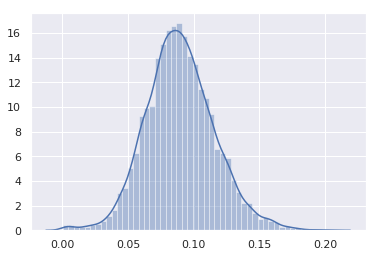

In [106]:
sns.distplot(city_gt_prevalence_UK.values())

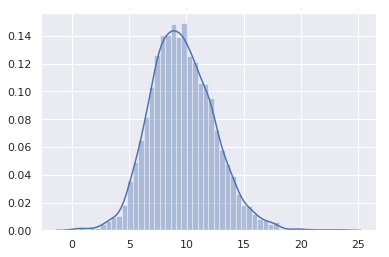

In [114]:
sns.distplot(city_prevalence_UK['depression'].values())

In [115]:
commonWards_UK_borough = set(city_prevalence_UK['depression'].keys()).intersection(city_gt_prevalence_UK.keys())

Text(0,0.5,'BNF prevalence')

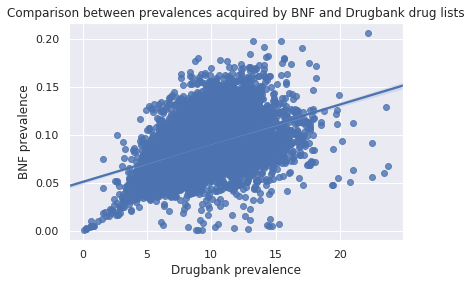

In [116]:
sns.regplot([ city_prevalence_UK['depression'][k] for k in commonWards_UK_borough],[city_gt_prevalence_UK[k] for k in commonWards_UK_borough])
ax = plt.gca()
ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
ax.set_xlabel("Drugbank prevalence")
ax.set_ylabel("BNF prevalence")

In [117]:
pearsonr([ city_prevalence_UK['depression'][k] for k in commonWards_UK_borough],[city_gt_prevalence_UK[k] for k in commonWards_UK_borough])

(0.42878610838234005, 0.0)

In [177]:
LSOA_disease_drug_count.keys()

['psoriasis',
 "Meniere's disease",
 "crohn's disease",
 'rheumatoid',
 'irritable bowel syndrome',
 'parkinson',
 'sleep apnea',
 'interstitial cystitis',
 'bipolar',
 'hypothyroidism',
 'dementia',
 'gastroparesis',
 'depression',
 'diabetes']

In [179]:
city_prevalence_UK.keys()

['psoriasis',
 "Meniere's disease",
 "crohn's disease",
 'gastroparesis',
 'irritable bowel syndrome',
 'parkinson',
 'sleep apnea',
 'interstitial cystitis',
 'bipolar',
 'hypothyroidism',
 'dementia',
 'rheumatoid',
 'depression',
 'diabetes']

In [180]:
sum(city_all_prescription_count.values())

7780565462.782055

In [79]:
# borough_disease_prescription_count['diabetes']

In [181]:
# borough_prevalence_UK['rheumatoid']

In [182]:
FinalDisease_prevalence = {'2016Q1':city_prevalence_UK}
with open('Disease_Prevalence_City.json','wb') as f:
    json.dump(FinalDisease_prevalence,f)

In [183]:
city_prevalence_UK

{"Meniere's disease": {'Barnsley': 0.005823871822539486,
  'Basildon': 0.0028201656582697576,
  'Basingstoke': 0.001487527975025461,
  'Bath': 0.0007832627833162701,
  'Bedford': 0.0013271170525029877,
  'Birkenhead': 0.0033094600943976075,
  'Birmingham': 0.002389716570399248,
  'Blackburn': 0.0027164284859945626,
  'Blackpool': 0.003957933299368927,
  'Bolton': 0.0036424040094668628,
  'Bournemouth': 0.001818471170171097,
  'Bracknell': 0.0012691698746131247,
  'Bradford': 0.0020894000186548276,
  'Brighton and Hove': 0.0015223459162123552,
  'Bristol': 0.0012299088025097217,
  'Burnley': 0.0024730564227927036,
  'Burton upon Trent': 0.002615269295709109,
  'Bury': 0.0023165532464344326,
  'Cambridge': 0.0008868274077191547,
  'Carlisle': 0.0017439871972939574,
  'Chatham': 0.001956832776649963,
  'Chelmsford': 0.0022849353415467055,
  'Cheltenham': 0.001312336044509614,
  'Chester': 0.002419829877707835,
  'Chesterfield': 0.002711636982938368,
  'Colchester': 0.0013564411315179238,


In [ ]:
symptomList= pd.read_csv("../BL_Work/Dis_sym_edited.csv")
symptomList.head()
normId = {}
for index , row in symptomList.iterrows():
    normId[row['norm_UID'].strip().lower()] = row['UID']

In [ ]:
city_prevalence_Symptom_UK = {}
city_symptom_prescription_count = {}
for d in LSOA_symptom_dosage_count:
    if d not in city_prevalence_Symptom_UK:
        city_symptom_prescription_count[d] = {}
        city_prevalence_Symptom_UK[d] = {}
        city_prevalence_Symptom_UK[d]['Id'] = normId[d]
        city_prevalence_Symptom_UK[d]['prev']={}

        for k in wardMap:
            try:
                city_disease_presc = np.sum([LSOA_symptom_dosage_count[d][w] for w in wardMap[k] if not np.isnan(LSOA_symptom_dosage_count[d][w])])
                city_symptom_prescription_count[d][k] = city_disease_presc
                city_prevalence_Symptom_UK[d]['prev'][k] = float(city_disease_presc)/float(cityPop[k])
            except:
                print "Some ward had wrong data"

In [125]:
len(city_prevalence_Symptom_UK['anxiety']['prev'])

7427

In [ ]:
json.dump(city_prevalence_Symptom_UK,open('2010_Ward_dosage_symptom_prevalence.json','wb'))

In [192]:
# FinalSymptom_prevalence = {'2016Q1':city_prevalence_Symptom_UK}
# with open('Symptom_Prevalence_city.json','wb') as f:
#     json.dump(FinalSymptom_prevalence,f)

In [198]:
# confidence_disease = json.load(open('../processed/DiseaseConfidence_V2_352.json','rb'))
# confidence_symptom = json.load(open('../processed/SymtomConfidence_with_normID_349.json','rb'))

In [199]:

# DiseasePrevalence = FinalDisease_prevalence['2016Q1']
# SymptomPrevalence = FinalSymptom_prevalence['2016Q1']

In [201]:
DiseasePop_byWard.keys()

['CKD',
 'LD',
 'DM',
 'CHD',
 'COPD',
 'AST',
 'DEP',
 'AF',
 'MH',
 'OB',
 'HYP',
 'PC',
 'OST',
 'PAD',
 'RA',
 'CVDPP',
 'CAN',
 'STIA',
 'HF',
 'EP',
 'DEM']

In [503]:
city_prevalence_UK = {}
city_prevalence_dosage_UK = {}
city_gt_prevalence_UK = {}
city_prescription_count = {}
disease_key = 'depression'
survey_key = 'DEP'
for k in tqdm(cityMap):
    try:
        city_disease_presc = np.sum([LSOA_disease_drug_count[disease_key][w] for w in cityMap[k] if not np.isnan(LSOA_disease_drug_count[disease_key][w])])
        city_disease_dosage_presc = np.sum([LSOA_disease_dosage_count[disease_key][w] for w in cityMap[k] if not np.isnan(LSOA_disease_dosage_count[disease_key][w])])
        city_patient_pop = np.sum([Ward_patients[survey_key][w] for w in cityMap[k] if not np.isnan(Ward_patients[survey_key][w])])
        city_disease_pop = np.sum([DiseasePop_byWard[survey_key][w] for w in cityMap[k] if not np.isnan(DiseasePop_byWard[survey_key][w])])
        
        city_prescription_count[k] = city_disease_presc
        city_prevalence_UK[k] = float(city_disease_presc)/float(cityPop[k])
        city_prevalence_dosage_UK[k] = float(city_disease_dosage_presc)/float(cityPop[k])
        city_gt_prevalence_UK[k] = float(city_disease_pop)/float(cityPop[k])
#         city_prevalence_UK[k] = float(city_disease_presc)/city_patient_pop
#         city_prevalence_dosage_UK[k] = float(city_disease_dosage_presc)/city_patient_pop
#         city_gt_prevalence_UK[k] = float(city_disease_pop)/city_patient_pop
    except:
        print("Some ward had wrong data")

100%|██████████| 112/112 [00:00<00:00, 413.44it/s]

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [504]:
# city_prescription_count

In [505]:
# json.dump(city_gt_prevalence_UK,open('dementia_survey_gt.json','wb'))

In [506]:
commonWards_UK_borough = set(city_prevalence_UK.keys()).intersection(city_gt_prevalence_UK.keys())

In [507]:
len(commonWards_UK_borough)

109

In [510]:
city_gt_prevalence_UK

{'Barnsley': 0.09925813378305692,
 'Basildon': 0.11054607775958883,
 'Basingstoke': 0.06600111283953669,
 'Bath': 0.06942634392765816,
 'Bedford': 0.07276541757013799,
 'Birkenhead': 0.14164879369986255,
 'Birmingham': 0.08852945815408246,
 'Blackburn': 0.09518544169595373,
 'Blackpool': 0.14520491808101207,
 'Bolton': 0.09637425055629911,
 'Bournemouth': 0.0861166381773844,
 'Bracknell': 0.11796671847666554,
 'Bradford': 0.09642003520089602,
 'Brighton and Hove': 0.09200147212781006,
 'Bristol': 0.09175156965397802,
 'Burnley': 0.08847362826964247,
 'Burton upon Trent': 0.08929889735013581,
 'Bury': 0.050364591399227075,
 'Cambridge': 0.08033180731379135,
 'Carlisle': 0.11028002197104676,
 'Chatham': 0.07803563000524978,
 'Chelmsford': 0.07405371180093084,
 'Cheltenham': 0.09124313707832613,
 'Chester': 0.10752241570007663,
 'Chesterfield': 0.11047291873068874,
 'Colchester': 0.06942167937073726,
 'Coventry': 0.08774367022731618,
 'Crawley': 0.09549986784249291,
 'Darlington': 0.11230

In [509]:
city_prevalence_UK

{'Barnsley': 0.09681992827419761,
 'Basildon': 0.07494696920223902,
 'Basingstoke': 0.05468708420353803,
 'Bath': 0.05066056381587927,
 'Bedford': 0.03348797820332159,
 'Birkenhead': 0.09568125222873837,
 'Birmingham': 0.04886068026263602,
 'Blackburn': 0.06863514856817794,
 'Blackpool': 0.10767931899540924,
 'Bolton': 0.06654713365219497,
 'Bournemouth': 0.05627709091373719,
 'Bracknell': 0.04626042948854352,
 'Bradford': 0.06461857702155357,
 'Brighton and Hove': 0.05748651244879622,
 'Bristol': 0.05853659100492829,
 'Burnley': 0.06809403441265977,
 'Burton upon Trent': 0.0616161505551591,
 'Bury': 0.05103204417559185,
 'Cambridge': 0.05748208900774292,
 'Carlisle': 0.06015022459190468,
 'Chatham': 0.058174512831629846,
 'Chelmsford': 0.06865940682232259,
 'Cheltenham': 0.07374045360959817,
 'Chester': 0.06318697555590819,
 'Chesterfield': 0.08212722942282263,
 'Colchester': 0.06850490229549659,
 'Coventry': 0.05735444032911497,
 'Crawley': 0.05050305691609985,
 'Darlington': 0.08428

In [468]:
# commonWards_UK_borough = [k for k in commonWards_UK_borough if k != 'Dudley']

In [469]:
# sns.regplot([ DiseasePrevalence['depression'][k]/100 for k in commonWards_UK_borough],[London_gt[k] for k in commonWards_UK_borough])
# ax = plt.gca()
# ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
# ax.set_xlabel("Drugbank prevalence")
# ax.set_ylabel("BNF prevalence")

In [470]:
# pearsonr([ DiseasePrevalence['depression'][k]  for k in commonWards_UK_borough],[London_gt[k] for k in commonWards_UK_borough])

In [471]:
# sns.regplot([ DiseasePrevalence['dementia'][k] for k in commonWards_UK_borough],[borough_gt_prevalence_UK[k] for k in commonWards_UK_borough])
# ax = plt.gca()
# ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
# ax.set_xlabel("Drugbank prevalence")
# ax.set_ylabel("BNF prevalence")

In [472]:
pearsonr([ city_prevalence_UK[k] for k in commonWards_UK_borough],[city_gt_prevalence_UK[k] for k in commonWards_UK_borough])

(0.4680854994386916, 2.8604428682774624e-07)

In [473]:
pearsonr([ city_prevalence_dosage_UK[k] for k in commonWards_UK_borough],[city_gt_prevalence_UK[k] for k in commonWards_UK_borough])

(0.6144469853146018, 1.1917344241114468e-12)

In [474]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=12)

def filterHighestResiduals(gt,predict,names , topK):
    slope, intercept, r_value, p_value, std_err = linregress(predict,gt)
    predicted = [(slope*k)+intercept for k in gt]
    residuals = [abs(v1 - v2) for (v1,v2) in zip(predicted,predict)]
    topKidx = np.argsort(residuals)[-topK:][::-1]
    return [gt[i] for i in topKidx] , [predict[i] for i in topKidx], [names[i] for i in topKidx]

predict = []
predict_dose = []
gt = []
names = []
logpop = []
logdosage = [] 
for k in commonWards_UK_borough:
    predict.append(city_prevalence_UK[k]*1000.0)
    predict_dose.append(city_prevalence_dosage_UK[k]*10)#*1000.0)
    names.append(k)
    gt.append(city_gt_prevalence_UK[k]*1000.0)
    logpop.append(np.log(cityPop[k]))
    logdosage.append(np.log(city_prescription_count[k]))

# predict

corr1 = pearsonr(predict,gt)
corr2 = pearsonr(predict_dose,gt)
print corr1 , corr2

(0.46808549943869154, 2.8604428682774624e-07) (0.614446985314602, 1.1917344241114238e-12)


In [475]:
disease_string = 'Dementia'

Text(0.1,0.8,'r = 0.46')

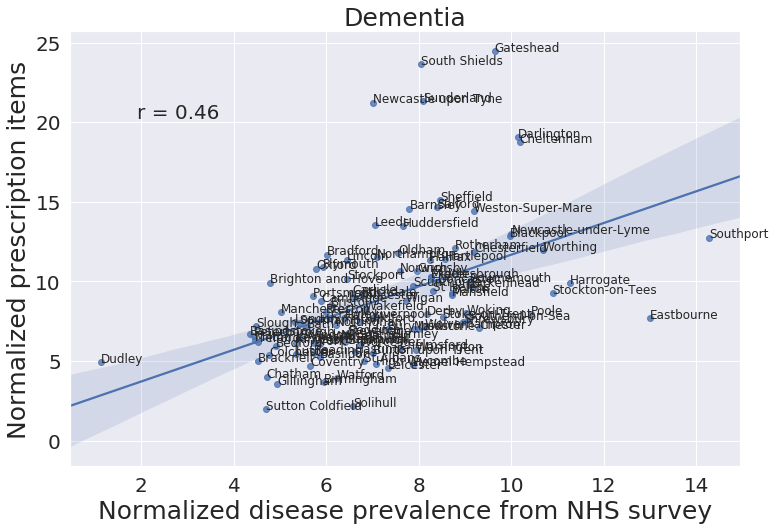

In [476]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x=gt , y = predict)
ax = plt.gca()
# gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 10)
label_point(gt , predict , names , ax)
ax.set_title(disease_string ,fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
ax.set_xlabel("Normalized disease prevalence from NHS survey",fontsize=25)
ax.set_ylabel("Normalized prescription items",fontsize=25)
ax.annotate("r = " +  str(corr1[0])[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)

Text(0.1,0.8,'r = 0.61')

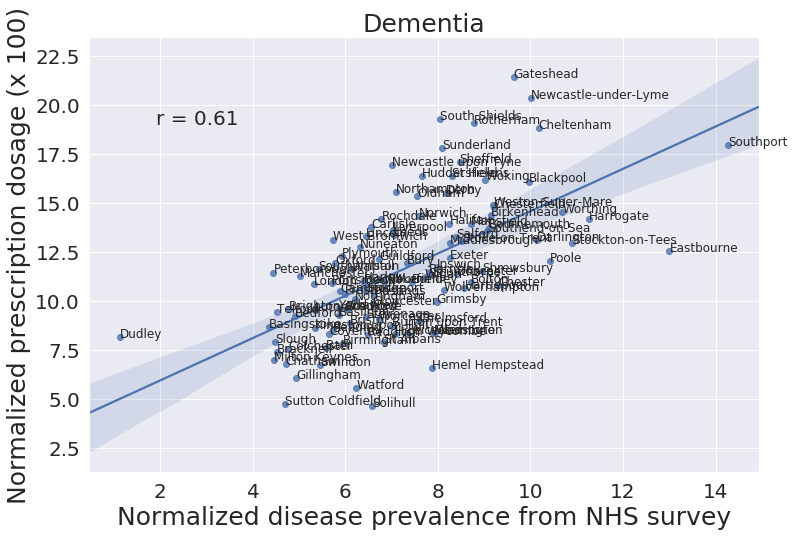

In [477]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x=gt , y = predict_dose)
ax = plt.gca()
# gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 10)
label_point(gt , predict_dose , names , ax)
ax.set_title(disease_string ,fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
ax.set_xlabel("Normalized disease prevalence from NHS survey",fontsize=25)
ax.set_ylabel("Normalized prescription dosage (x 100)",fontsize=25)
ax.annotate("r = " +  str(corr2[0])[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)

In [478]:
from scipy.stats import linregress

corr = pearsonr(predict, gt)
print corr

slope, intercept, r_value, p_value, std_err = linregress(x=predict,y=gt)

print slope,  intercept , r_value , p_value , std_err

(0.46808549943869154, 2.8604428682774624e-07)
0.22005532587347262 5.250528138658121 0.4680854994386918 2.860442868277419e-07 0.040161636128594885


In [479]:
from scipy.stats import linregress

corr = pearsonr(logpop, logdosage)
print corr

slope, intercept, r_value, p_value, std_err = linregress(x=logpop,y=logdosage)

print slope,  intercept , r_value , p_value , std_err

(0.8389157299349423, 4.9232752067478644e-30)
0.9921299139684787 -4.723121227497177 0.8389157299349423 4.923275206747867e-30 0.06222512797802202


In [480]:
r_value**2

0.7037796019322771

Text(0.1,0.7,'$R^2$: 0.70')

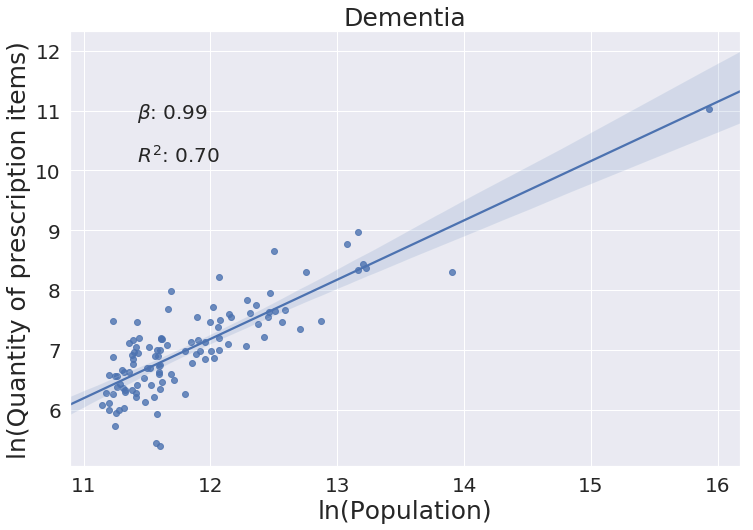

In [481]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=logpop,y=logdosage,ax=ax)
ax.set_xlabel("ln(Population)",fontsize=25)
ax.set_ylabel("ln(Quantity of prescription items)",fontsize=25)
ax.set_title(disease_string,fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
# label_point(logpop , logdosage , names , ax)
ax.annotate(r"$\beta$" +": " +  str(slope)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$R^2$" +": " +  str(r_value**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)